In [7]:
pip install pymongo pandas Matplotlib Seaborn

Note: you may need to restart the kernel to use updated packages.


Jumlah data 395


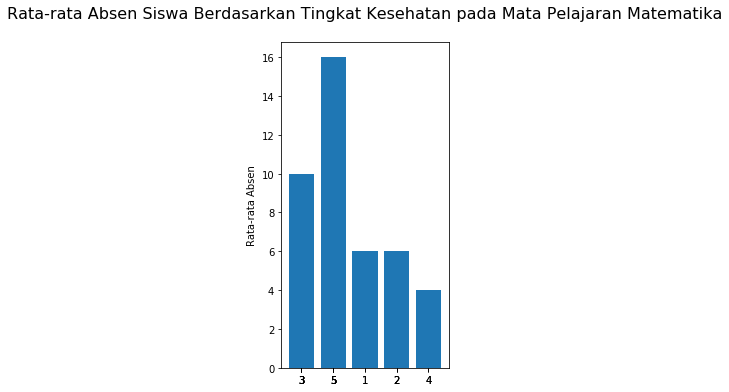

In [37]:
# main.ipynb
# 
# Final Project Basisdata Lanjut 
# Visualisasi data pada struktur dua dimensi rata2 absen  
# terhadap tingkat kesehatan siswa. Menggunakan data 
# Student Performance matakuliah matematika
# http://archive.ics.uci.edu/ml/datasets/Student+Performance
# 
# M Zufar Taqiuddin <2021>

import json
import pandas as pd
import pymongo
from bson.json_util import dumps
import matplotlib.pyplot as plt

myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017") # server mongoDB
mydb = myclient["StudentPerformance"] # nama database
mycol = mydb["student-mat"] # nama collection

# Menghitung isidata
query = mycol.estimated_document_count() # query yang dijalankan
print("Jumlah data",query) # output query

# ----------------------------
# Data Cleaning
# ----------------------------
# Menampilkan kolom yang diperlukan pada Dataframe
query_m = mycol.find({},{ 'absences': 1, '_id': 1, 'health':1 }) # query yang dijalankan menhasilkan data tipe cursor
list_cur_m = list(query_m) # konversi cursor menjadi list
df_m = pd.DataFrame(list_cur_m) # pemrosesan data menggunakan library pandas
df_m = df_m.fillna(method='pad').head(20) # Ubah/isikan pada data yang kosong dengan nilai setelahnya

# ----------------------------
# Repersentasi Data
# ----------------------------
# Matplotlib init
plt.figure(figsize=(3, 6))
rata2_absen = df_m["absences"].astype(float) #rata2 absen
plt.bar(df_m['health'], rata2_absen ) # mengisikan nilai pada statistik bar
plt.xticks(df_m['health'], rotation=0)
plt.ylabel('Rata-rata Absen')
plt.title('Rata-rata Absen Siswa Berdasarkan Tingkat Kesehatan pada Mata Pelajaran Matematika\n', size=16)
plt.show()